# Mask Detection using Pytorch

The Annotations are in xml format and images are in png. 

In [2]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import os
from torchvision import datasets, transforms,models
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import xmltodict
from collections import Counter

/home/dheeraj/anaconda3/envs/Coding/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
img_names = []
xml_names = []
for dirname, _ , filenames in os.walk('data/'):
    for filename in filenames:
        if os.path.join(dirname, filename)[-3:]!="xml":
            img_names.append(filename)
        else:
            xml_names.append(filename)    

In [4]:
path_annotations = "data/annotations/"
listing = []

for i in img_names[:]:
    with open(path_annotations+i[:-4]+".xml") as fd:
        doc = xmltodict.parse(fd.read())
    temp = doc["annotation"]["object"]
    if type(temp) == list:
        for i in  range(len(temp)):
            listing.append(temp[i]["name"])
    else:
        listing.append(temp["name"])

Items = Counter(listing).keys()
values = Counter(listing).values()
print(Items, '\n', values)

dict_keys(['with_mask', 'without_mask', 'mask_weared_incorrect']) 
 dict_values([3232, 717, 123])


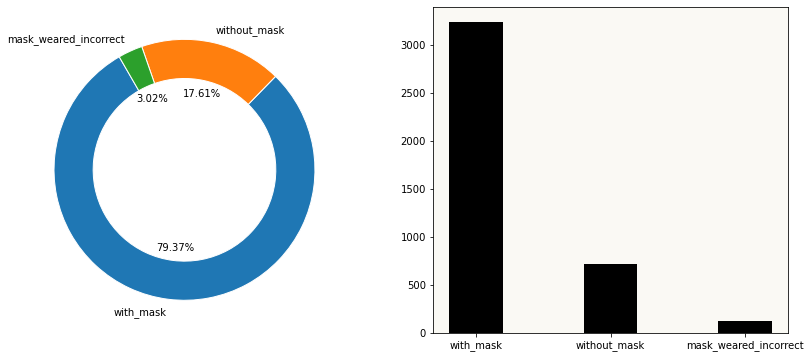

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,6))
background_color = '#faf9f4'
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax1.pie(values, wedgeprops=dict(width=0.3, edgecolor='w'), 
        labels=Items, radius = 1, startangle = 120, autopct = '%1.2f%%')
ax2 = plt.bar(Items, list(values), color = 'black', width = 0.4)
plt.show()

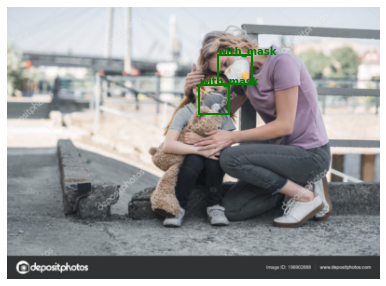

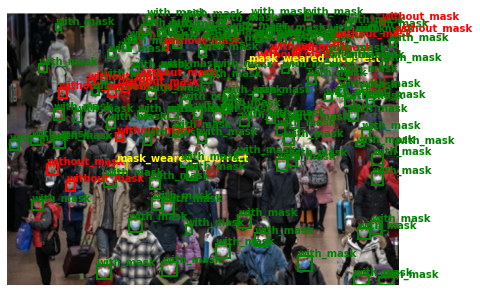

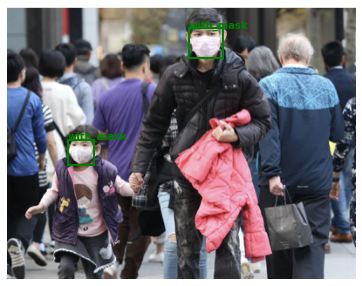

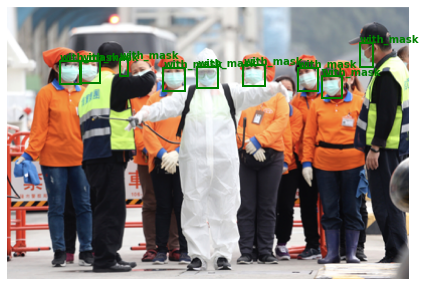

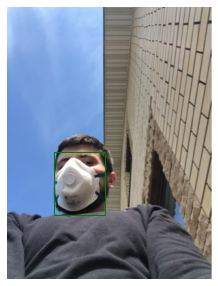

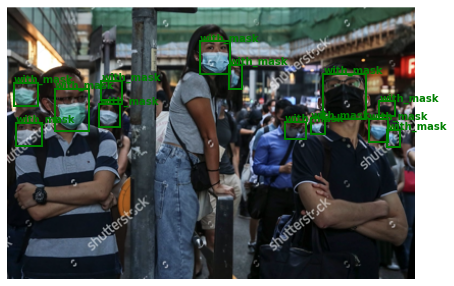

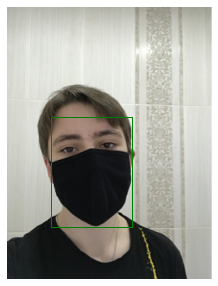

In [11]:
path_image="data/images/"  
def face_cas(img): 
    with open(path_annotations+img[:-4]+".xml") as fd:
        doc=xmltodict.parse(fd.read())
    image=plt.imread(os.path.join(path_image+img))
    fig,ax=plt.subplots(1)
    ax.axis("off")
    fig.set_size_inches(10,5)
    temp=doc["annotation"]["object"]
    if type(temp)==list:
        for i in range(len(temp)):
            ###with_mask
            if temp[i]["name"]=="with_mask":
                x,y,w,h=list(map(int,temp[i]["bndbox"].values()))
                mpatch=mpatches.Rectangle((x,y),w-x,h-y,linewidth=1, edgecolor='g',facecolor="none",lw=2,)
                ax.add_patch(mpatch)
                rx, ry = mpatch.get_xy()
                ax.annotate("with_mask", (rx, ry), color='green', weight='bold', fontsize=10, ha='left', va='baseline')
            ###without_mask
            if temp[i]["name"]=="without_mask":
                x,y,w,h=list(map(int,temp[i]["bndbox"].values()))     
                mpatch=mpatches.Rectangle((x,y),w-x,h-y,linewidth=1, edgecolor='r',facecolor="none",lw=2,)
                ax.add_patch(mpatch)
                rx, ry = mpatch.get_xy()
                ax.annotate("without_mask", (rx, ry), color='red', weight='bold', fontsize=10, ha='left', va='baseline')
            ###mask_weared_incorrect
            if temp[i]["name"]=="mask_weared_incorrect":
                x,y,w,h=list(map(int,temp[i]["bndbox"].values()))
                mpatch=mpatches.Rectangle((x,y),w-x,h-y,linewidth=1, edgecolor='y',facecolor="none",lw=2,)
                ax.add_patch(mpatch)
                rx, ry = mpatch.get_xy()
                ax.annotate("mask_weared_incorrect", (rx, ry), color='yellow', weight='bold', fontsize=10, ha='left', va='baseline')
    else:
        x,y,w,h=list(map(int,temp["bndbox"].values()))
        edgecolor={"with_mask":"g","without_mask":"r","mask_weared_incorrect":"y"}
        mpatch=mpatches.Rectangle((x,y),w-x,h-y,linewidth=1, edgecolor=edgecolor[temp["name"]],facecolor="none",)
    ax.imshow(image)
    ax.add_patch(mpatch)

test_images = img_names.copy()
for i in range(1,8):
    face_cas(test_images[i])